In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diamonds_new.csv")
df.head(19)

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
6,0.24,Very Good,I,VVS1,57.0,3.95,3.98,2.47,168.0
7,0.26,Very Good,H,SI1,55.0,4.07,4.11,2.53,168.5
8,0.22,Fair,E,VS2,61.0,3.87,3.78,2.49,168.5
9,0.23,Very Good,H,VS1,61.0,4.00,4.05,2.39,169.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

<Axes: >

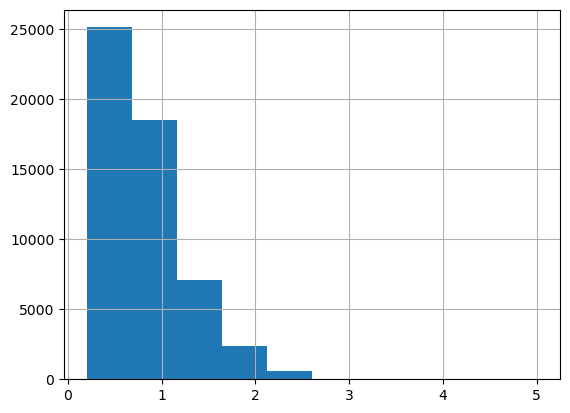

In [6]:
df['carat'].hist()

<Axes: >

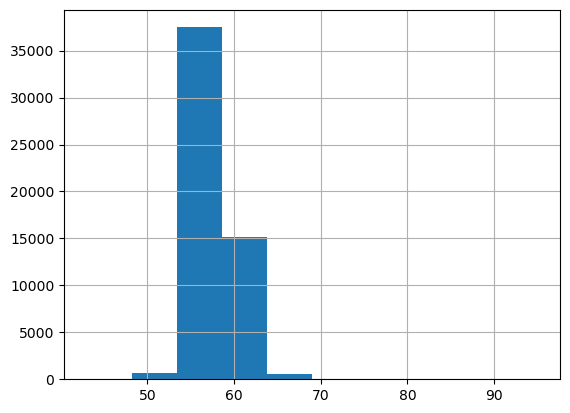

In [7]:
df['table'].hist()

In [8]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [10]:
df2 = df.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

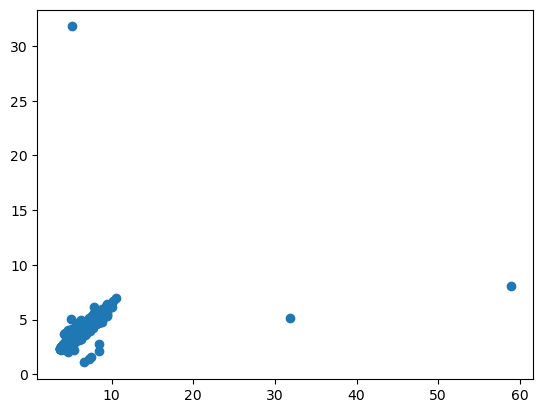

In [11]:
plt.scatter(df2['y'], df2['z'])
plt.show()


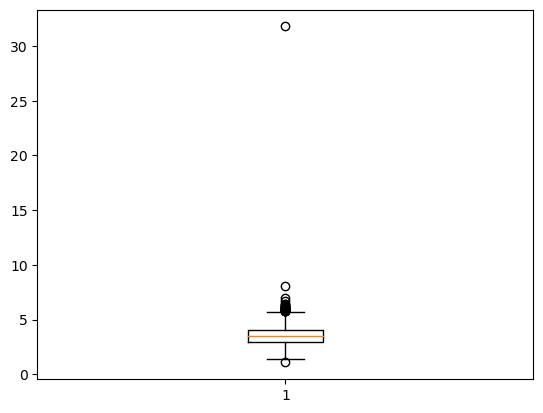

In [12]:
plt.boxplot(df2['z'])
plt.show()

In [13]:
df2[(df2['y'] > 15) | (df2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [14]:
df3 = df2.drop([24067, 48410, 49189])

In [15]:
df3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [16]:
df3['carat'].fillna(df3['carat'].median(), inplace=True)
df3['table'].fillna(df3['table'].median(), inplace=True)
df3['color'].fillna("G", inplace=True)

In [17]:
df3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [18]:
df3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [19]:
y = df3['price_new']
x = df3.drop("price_new", axis=1)

In [20]:
x = pd.get_dummies(x)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
mn = MinMaxScaler()
x = mn.fit_transform(x)

In [23]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
x.shape

(53929, 25)

In [26]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])

In [29]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 1s 2ms/step - loss: 5005143.0000 - mean_squared_error: 5005143.0000
Epoch 2/10
338/338 [==============================] - 1s 2ms/step - loss: 3998185.5000 - mean_squared_error: 3998185.5000
Epoch 3/10
338/338 [==============================] - 1s 2ms/step - loss: 3998087.2500 - mean_squared_error: 3998087.2500
Epoch 4/10
338/338 [==============================] - 1s 2ms/step - loss: 3998140.0000 - mean_squared_error: 3998140.0000
Epoch 5/10
338/338 [==============================] - 1s 2ms/step - loss: 3997973.2500 - mean_squared_error: 3997973.2500
Epoch 6/10
338/338 [==============================] - 1s 2ms/step - loss: 3998170.7500 - mean_squared_error: 3998170.7500
Epoch 7/10
338/338 [==============================] - 1s 2ms/step - loss: 3998290.7500 - mean_squared_error: 3998290.7500
Epoch 8/10
338/338 [==============================] - 1s 2ms/step - loss: 3998136.5000 - mean_squared_error: 3998136.5000
Epoch 9/10
338/338 [====

In [30]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 3899746.2500 - mean_squared_error: 3899746.2500


[3899746.25, 3899746.25]

In [ ]:
#Model2

In [31]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (25,), activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))

In [32]:
model2.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model2.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 2/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 3/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 7/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 8/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 9/30
338/338 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 10/30
338/338 [==============================] - 1s 2ms/st

In [ ]:
#Model3

In [33]:
model3 = Sequential()
model3.add(Dense(128, input_shape = (25,), activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(16, activation = "relu"))
model3.add(Dense(1, activation = None))

In [34]:
model3.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 4s 6ms/step - loss: 2178217.5000 - mean_squared_error: 2178217.5000
Epoch 2/30
338/338 [==============================] - 2s 6ms/step - loss: 217297.8125 - mean_squared_error: 217297.8125
Epoch 3/30
338/338 [==============================] - 2s 6ms/step - loss: 204055.4375 - mean_squared_error: 204055.4375
Epoch 4/30
338/338 [==============================] - 2s 6ms/step - loss: 202489.2031 - mean_squared_error: 202489.2031
Epoch 5/30
338/338 [==============================] - 2s 6ms/step - loss: 189821.5781 - mean_squared_error: 189821.5781
Epoch 6/30
338/338 [==============================] - 2s 6ms/step - loss: 192247.7656 - mean_squared_error: 192247.7656
Epoch 7/30
338/338 [==============================] - 2s 6ms/step - loss: 184373.2031 - mean_squared_error: 184373.2031
Epoch 8/30
338/338 [==============================] - 2s 5ms/step - loss: 180244.3750 - mean_squared_error: 180244.3750
Epoch 9/30
338/338 [==================

In [35]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 177227.2969 - mean_squared_error: 177227.2969


[177227.296875, 177227.296875]

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

310752.1223808641

In [39]:
from tensorflow.keras.regularizers import l2

In [40]:
model4 = Sequential()
model4.add(Dense(128, input_shape = (25,), activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(16, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(8, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(1, activation = None))

In [41]:
model4.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model4.fit(x_train, y_train, epochs = 40, batch_size = 128)

Epoch 1/40
338/338 [==============================] - 6s 7ms/step - loss: 3069371.0000 - mean_squared_error: 3069363.7500
Epoch 2/40
338/338 [==============================] - 2s 7ms/step - loss: 784623.8125 - mean_squared_error: 784617.0625
Epoch 3/40
338/338 [==============================] - 2s 7ms/step - loss: 749175.5000 - mean_squared_error: 749167.5625
Epoch 4/40
338/338 [==============================] - 2s 7ms/step - loss: 729754.5000 - mean_squared_error: 729746.8125
Epoch 5/40
338/338 [==============================] - 2s 7ms/step - loss: 721524.1875 - mean_squared_error: 721517.3125
Epoch 6/40
338/338 [==============================] - 2s 7ms/step - loss: 707426.3125 - mean_squared_error: 707419.0625
Epoch 7/40
338/338 [==============================] - 2s 6ms/step - loss: 714375.2500 - mean_squared_error: 714367.9375
Epoch 8/40
338/338 [==============================] - 2s 7ms/step - loss: 690182.6250 - mean_squared_error: 690175.6875
Epoch 9/40
338/338 [==================

In [42]:
model4.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 89138.8359 - mean_squared_error: 89130.2266


[89138.8359375, 89130.2265625]